In [1]:
import os
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import FloatProgress
from IPython.display import display
import time
import os.path
from os import path
import pickle

import sys
sys.path.insert(0, '../completenessContours')
import compute_num_completeness_w_ve_insol as kp

sys.path.insert(0, '..')
import occRateUtils as ut
import occRateModels as rm
import rateModels3D as rm3D

In [2]:
stellarTypes = ["hab", "hab2"]
extrapTypes = ["extrap_const", "extrap_zero"]
hzTypes = ["optimistic", "conservative"]
catalog = "dr25"

figDir = "summaryFigures"

In [3]:
fileName = "hzOcc_model3_uncertainty.pkl"
if path.exists(fileName): 
    f = open(fileName, "rb")    
    hzOcc = pickle.load(f)
    f.close()
else:
    hzOcc = {}
    for stellarType in stellarTypes:
        if stellarType == "hab":
            teffRange = (4800, 6300)
        elif stellarType == "hab2":
            teffRange = (3900, 6300)
        elif stellarType == "GK":
            teffRange = (3900, 6000)
        elif stellarType == "FGK":
            teffRange = (3900, 7300)
        else:
            raise ValueError('Bad catalog name');

        cs = rm3D.compSpace(periodName = "Insolation", 
                       periodUnits = "Earth Flux",
                       periodRange = (0.2, 2.2), 
                       nPeriod = 61, 
                       radiusName = "Radius", 
                       radiusUnits = "$R_\oplus$",
                       rpRange = (0.5, 2.5), 
                       nRp = 61,
                       tempName = "$T_\mathrm{eff}$", 
                       tempUnits = "$R_\oplus$",
                       tempRange = teffRange, 
                       nTemp = 10)

        model = rm3D.dualPowerLawFixedTeffAvg(cs) # model 3
        hzOcc[stellarType] = {}
        for extrapType in extrapTypes:
            outDir = "computeOccurrencefixedTeff_" + catalog + "_" + stellarType + "_"  \
                + model.name + "_" + extrapType + "_uncertainty_out"
            print(outDir)
            if not path.exists(outDir): 
                print("does not exist")
                continue

            hzOcc[stellarType][extrapType] = {}
            for hzType in hzTypes:
                hzOcc[stellarType][extrapType][hzType] = {}

                post = np.load(outDir + "/occurenceRatePosteriors.npy")           
                hzOcc[stellarType][extrapType][hzType]["reliability"] = {}
                hzOcc[stellarType][extrapType][hzType]["reliability"]["fitData"] \
                    = ut.medianAndErrorbars(post)
                hzOcc[stellarType][extrapType][hzType]["reliability"]["dist"], \
                    hzOcc[stellarType][extrapType][hzType]["reliability"]["teff"] \
                    = rm3D.hzOccRate2D([4800,6300], [0.5,1.5], post, model, 
                                     cs, nSamples = 10000, hzType = hzType)
                hzOcc[stellarType][extrapType][hzType]["reliability"]["str"] \
                    = ut.printMedianAndErrorbars(hzOcc[stellarType][extrapType][hzType]["reliability"]["dist"].flatten(), precision=2)

                post = np.load(outDir + "/occurenceRatePosteriors_noreliability.npy")           
                hzOcc[stellarType][extrapType][hzType]["noReliability"] = {}
                hzOcc[stellarType][extrapType][hzType]["noReliability"]["fitData"] \
                    = ut.medianAndErrorbars(post)
                hzOcc[stellarType][extrapType][hzType]["noReliability"]["dist"], \
                    hzOcc[stellarType][extrapType][hzType]["noReliability"]["teff"] \
                    = rm3D.hzOccRate2D([4800,6300], [0.5,1.5], post, model, 
                                     cs, nSamples = 10000, hzType = hzType)
                hzOcc[stellarType][extrapType][hzType]["noReliability"]["str"] \
                    = ut.printMedianAndErrorbars(hzOcc[stellarType][extrapType][hzType]["noReliability"]["dist"], precision=2)

    f = open(fileName,"wb")
    pickle.dump(hzOcc,f)
    f.close()

In [3]:
fileName = "hzOccTeff_model1_uncertainty.pkl"
if path.exists(fileName): 
    f = open(fileName, "rb")    
    hzOccTeff = pickle.load(f)
    f.close()
else:
    hzOccTeff = {}
    for stellarType in stellarTypes:
        if stellarType == "hab":
            teffRange = (4800, 6300)
        elif stellarType == "hab2":
            teffRange = (3900, 6300)
        elif stellarType == "GK":
            teffRange = (3900, 6000)
        elif stellarType == "FGK":
            teffRange = (3900, 7300)
        else:
            raise ValueError('Bad catalog name');

        cs = rm3D.compSpace(periodName = "Insolation", 
                       periodUnits = "Earth Flux",
                       periodRange = (0.2, 2.2), 
                       nPeriod = 61, 
                       radiusName = "Radius", 
                       radiusUnits = "$R_\oplus$",
                       rpRange = (0.5, 2.5), 
                       nRp = 61,
                       tempName = "$T_\mathrm{eff}$", 
                       tempUnits = "$R_\oplus$",
                       tempRange = teffRange, 
                       nTemp = 10)

        model = rm3D.triplePowerLawTeffAvg(cs) # model 1
        hzOccTeff[stellarType] = {}
        for extrapType in extrapTypes:
            outDir = "computeOccurrencefixedTeff_" + catalog + "_" + stellarType + "_"  \
                + model.name + "_" + extrapType + "_uncertainty_out"
            print(outDir)
            if not path.exists(outDir): 
                print("does not exist")
                continue
            hzOccTeff[stellarType][extrapType] = {}
            for hzType in hzTypes:
                hzOccTeff[stellarType][extrapType][hzType] = {}

                post = np.load(outDir + "/occurenceRatePosteriors.npy")           
                hzOccTeff[stellarType][extrapType][hzType]["reliability"] = {}
                hzOccTeff[stellarType][extrapType][hzType]["reliability"]["fitData"] \
                    = ut.medianAndErrorbars(post)
                hzOccTeff[stellarType][extrapType][hzType]["reliability"]["dist"], \
                    hzOccTeff[stellarType][extrapType][hzType]["reliability"]["teff"] \
                    = rm3D.hzOccRate2D([4800,6300], [0.5,1.5], post, model, 
                                     cs, nSamples = 10000, hzType = hzType)
                hzOccTeff[stellarType][extrapType][hzType]["reliability"]["str"] \
                    = ut.printMedianAndErrorbars(hzOccTeff[stellarType][extrapType][hzType]["reliability"]["dist"].flatten(), precision=2)

                post = np.load(outDir + "/occurenceRatePosteriors_noreliability.npy")           
                hzOccTeff[stellarType][extrapType][hzType]["noReliability"] = {}
                hzOccTeff[stellarType][extrapType][hzType]["noReliability"]["fitData"] \
                    = ut.medianAndErrorbars(post)
                hzOccTeff[stellarType][extrapType][hzType]["noReliability"]["dist"], \
                    hzOccTeff[stellarType][extrapType][hzType]["noReliability"]["teff"] \
                    = rm3D.hzOccRate2D([4800,6300], [0.5,1.5], post, model, 
                                     cs, nSamples = 10000, hzType = hzType)
                hzOccTeff[stellarType][extrapType][hzType]["noReliability"]["str"] \
                    = ut.printMedianAndErrorbars(hzOccTeff[stellarType][extrapType][hzType]["noReliability"]["dist"], precision=2)

    f = open(fileName,"wb")
    pickle.dump(hzOccTeff,f)
    f.close()

In [5]:
fileName = "hzOccTriple_model2_uncertainty.pkl"
if path.exists(fileName): 
    f = open(fileName, "rb")    
    hzOccTriple = pickle.load(f)
    f.close()
else:
    hzOccTriple = {}
    for stellarType in stellarTypes:
        if stellarType == "hab":
            teffRange = (4800, 6300)
        elif stellarType == "hab2":
            teffRange = (3900, 6300)
        elif stellarType == "GK":
            teffRange = (3900, 6000)
        elif stellarType == "FGK":
            teffRange = (3900, 7300)
        else:
            raise ValueError('Bad catalog name');

        cs = rm3D.compSpace(periodName = "Insolation", 
                       periodUnits = "Earth Flux",
                       periodRange = (0.2, 2.2), 
                       nPeriod = 61, 
                       radiusName = "Radius", 
                       radiusUnits = "$R_\oplus$",
                       rpRange = (0.5, 2.5), 
                       nRp = 61,
                       tempName = "$T_\mathrm{eff}$", 
                       tempUnits = "$R_\oplus$",
                       tempRange = teffRange, 
                       nTemp = 10)

        model = rm3D.triplePowerLaw(cs) # model 2
        hzOccTriple[stellarType] = {}
        for extrapType in extrapTypes:
            outDir = "computeOccurrencefixedTeff_" + catalog + "_" + stellarType + "_"  \
                + model.name + "_" + extrapType + "_uncertainty_out"
            print(outDir)
            if not path.exists(outDir): 
                print("does not exist")
                continue

            hzOccTriple[stellarType][extrapType] = {}
            for hzType in hzTypes:
                hzOccTriple[stellarType][extrapType][hzType] = {}

                post = np.load(outDir + "/occurenceRatePosteriors.npy")           
                hzOccTriple[stellarType][extrapType][hzType]["reliability"] = {}
                hzOccTriple[stellarType][extrapType][hzType]["reliability"]["fitData"] \
                    = ut.medianAndErrorbars(post)
                hzOccTriple[stellarType][extrapType][hzType]["reliability"]["dist"], \
                    hzOccTriple[stellarType][extrapType][hzType]["reliability"]["teff"] \
                    = rm3D.hzOccRate2D([4800,6300], [0.5,1.5], post, model, 
                                     cs, nSamples = 10000, hzType = hzType)
                hzOccTriple[stellarType][extrapType][hzType]["reliability"]["str"] \
                    = ut.printMedianAndErrorbars(hzOccTriple[stellarType][extrapType][hzType]["reliability"]["dist"].flatten(), precision=2)

                post = np.load(outDir + "/occurenceRatePosteriors_noreliability.npy")           
                hzOccTriple[stellarType][extrapType][hzType]["noReliability"] = {}
                hzOccTriple[stellarType][extrapType][hzType]["noReliability"]["fitData"] \
                    = ut.medianAndErrorbars(post)
                hzOccTriple[stellarType][extrapType][hzType]["noReliability"]["dist"], \
                    hzOccTriple[stellarType][extrapType][hzType]["noReliability"]["teff"] \
                    = rm3D.hzOccRate2D([4800,6300], [0.5,1.5], post, model, 
                                     cs, nSamples = 10000, hzType = hzType)
                hzOccTriple[stellarType][extrapType][hzType]["noReliability"]["str"] \
                    = ut.printMedianAndErrorbars(hzOccTriple[stellarType][extrapType][hzType]["noReliability"]["dist"], precision=2)

    f = open(fileName,"wb")
    pickle.dump(hzOccTriple,f)
    f.close()

In [6]:
f = open("hzOccTeff.pkl", "rb")    
hzOccTeff0 = pickle.load(f)
f.close()
f = open("hzOccTriple.pkl", "rb")    
hzOccTriple0 = pickle.load(f)
f.close()
f = open("hzOcc.pkl", "rb")    
hzOcc0 = pickle.load(f)
f.close()


In [7]:
print("$" + str(round(23.4028, 2)) + "^{+" 
      + str(round(23.4028, 2)) + "}_{-" + str(round(23.4028, 2)) + "}$")
print("$" + "{value:+0.{precision}f}".format(value=-23.4028, precision=2) + "^{+" 
      + str(round(23.4028, 2)) + "}_{-" + str(round(23.4028, 2)) + "}$")


$23.4^{+23.4}_{-23.4}$
$-23.40^{+23.4}_{-23.4}$


In [8]:
def print_extrap_types(data, stellarType, extrapType, index):
    stats = data[stellarType][extrapType]["optimistic"]["reliability"]["fitData"]
#     print("$" + str(round(stats[index][0], 2)) + "^{+" 
#           + str(round(stats[index][1], 2)) + "}_{-" + str(round(stats[index][2], 2)) + "}$")
    print("$" + "{value:+0.{precision}f}".format(value=stats[index][0], precision=2) + "^{+" 
          + str(round(stats[index][1], 2)) + "}_{-" + str(round(stats[index][2], 2)) + "}$")

def print_stellar_types(data, data0, index):
    for stellarType in stellarTypes:
        print(" & ")
        print_extrap_types(data, stellarType, "extrap_const", index) 
        print(" -- ")
        print_extrap_types(data, stellarType, "extrap_zero", index)
    for stellarType in stellarTypes:
        print(" & ")
        print_extrap_types(data0, stellarType, "extrap_const", index) 
        print(" -- ")
        print_extrap_types(data0, stellarType, "extrap_zero", index)

def print_occ_types(data, data0, hzType):
    for stellarType in stellarTypes:
        print("& $" 
              + data[stellarType]["extrap_const"][hzType]["reliability"]["str"] + "$ -- $"
              + data[stellarType]["extrap_zero"][hzType]["reliability"]["str"] + "$ ")
    for stellarType in stellarTypes:
        print("& $" 
              + data0[stellarType]["extrap_const"][hzType]["reliability"]["str"] + "$ -- $"
              + data0[stellarType]["extrap_zero"][hzType]["reliability"]["str"] + "$ ")

def print_pop_table(data, data0, modelNum, hasGamma):
    print("& \\multicolumn{4}{c}{Model " + str(modelNum) + "} \\\\")
    print("$F_0$")
    print_stellar_types(data, data0, 0)
    print("\\\\")
    print("$\\alpha$")
    print_stellar_types(data, data0, 2)
    print("\\\\")
    print("$\\beta$")
    print_stellar_types(data, data0, 1)
    print("\\\\")
    if hasGamma:
        print("$\\gamma$")
        print_stellar_types(data, data0, 3)
        print("\\\\")
#     print("$\\eta_\oplus^C$")
#     print_occ_types(data, data0, "conservative")
#     print("\\\\")
#     print("$\\eta_\oplus^O$")
#     print_occ_types(data, data0, "optimistic")
#     print("\\\\")


In [9]:
print("% fits with uncertainty")
print("& \\multicolumn{2}{c}{With Uncertainty} & \\multicolumn{2}{c}{Without Uncertainty} \\\\")
for stellarType in stellarTypes:
    print(" & " + stellarType)
for stellarType in stellarTypes:
    print(" & " + stellarType)
print("\\\\")
print("& low -- high & low -- high  & low -- high & low -- high  \\\\")
print("\\hline")
print_pop_table(hzOccTeff, hzOccTeff0, 1, True)
print_pop_table(hzOccTriple, hzOccTriple0, 2, True)
print_pop_table(hzOcc, hzOcc0, 3, False)


% fits with uncertainty
& \multicolumn{2}{c}{With Uncertainty} & \multicolumn{2}{c}{Without Uncertainty} \\
 & hab
 & hab2
 & hab
 & hab2
\\
& low -- high & low -- high  & low -- high & low -- high  \\
\hline
& \multicolumn{4}{c}{Model 1} \\
$F_0$
 & 
$+1.08^{+1.56}_{-0.57}$
 -- 
$+1.97^{+3.73}_{-1.17}$
 & 
$+1.11^{+0.88}_{-0.44}$
 -- 
$+1.59^{+1.56}_{-0.7}$
 & 
$+0.70^{+0.77}_{-0.32}$
 -- 
$+1.41^{+2.12}_{-0.77}$
 & 
$+1.02^{+0.66}_{-0.37}$
 -- 
$+1.46^{+1.18}_{-0.59}$
\\
$\alpha$
 & 
$-1.05^{+1.41}_{-1.2}$
 -- 
$-1.09^{+1.36}_{-1.18}$
 & 
$-1.08^{+0.94}_{-0.85}$
 -- 
$-1.18^{+0.96}_{-0.87}$
 & 
$-0.29^{+1.39}_{-1.18}$
 -- 
$-0.51^{+1.35}_{-1.15}$
 & 
$-0.96^{+0.83}_{-0.74}$
 -- 
$-1.03^{+0.83}_{-0.77}$
\\
$\beta$
 & 
$-0.56^{+0.48}_{-0.42}$
 -- 
$-1.18^{+0.6}_{-0.56}$
 & 
$-0.84^{+0.32}_{-0.3}$
 -- 
$-1.19^{+0.37}_{-0.36}$
 & 
$-0.43^{+0.46}_{-0.4}$
 -- 
$-1.13^{+0.54}_{-0.5}$
 & 
$-0.78^{+0.3}_{-0.28}$
 -- 
$-1.15^{+0.34}_{-0.33}$
\\
$\gamma$
 & 
$-1.84^{+3.33}_{-3.39}$
 -- 
$+0.91^

In [10]:
teffTypes = ["hab", "hab2", "K", "G"]
teffRanges = [[4800, 6300], [3900, 6300], [3900, 5300], [5300, 6000] ]
teffLabels = ["4800K -- 6300K", "3900K -- 6300K", "3900K -- 5300K (K)", "5300K -- 6000K (G)"]
radTypes = ["small", "all", "large"]
radRanges = [[0.5, 1.5], [0.5, 2.5], [1.5, 2.5]]
radLabels = ["$0.5$ -- $1.5 R_\oplus$", "$0.5$ -- $2.5 R_\oplus$", "$1.5$ -- $2.5 R_\oplus$"]


# compute the various hab2 occurrence rates
fileName = "hab2Occ_model1_uncertainty.pkl"
if path.exists(fileName): 
    f = open(fileName, "rb")    
    hab2Occ = pickle.load(f)
    f.close()
else:
    hab2Occ = {}
    cs = rm3D.compSpace(periodName = "Insolation", 
                   periodUnits = "Earth Flux",
                   periodRange = (0.2, 2.2), 
                   nPeriod = 61, 
                   radiusName = "Radius", 
                   radiusUnits = "$R_\oplus$",
                   rpRange = (0.5, 2.5), 
                   nRp = 61,
                   tempName = "$T_\mathrm{eff}$", 
                   tempUnits = "$R_\oplus$",
                   tempRange = (3900, 6300), 
                   nTemp = 10)

    model = rm3D.triplePowerLawTeffAvg(cs) # model 1
    for tr, teffType in enumerate(teffTypes):
        hab2Occ[teffType] = {}
        for rr, radType in enumerate(radTypes):
            hab2Occ[teffType][radType] = {}
            for extrapType in extrapTypes:
                outDir = "computeOccurrencefixedTeff_dr25_hab2_"  \
                    + model.name + "_" + extrapType + "_uncertainty_out"
                print(outDir)
                if not path.exists(outDir): 
                    print("does not exist")
                    continue

                hab2Occ[teffType][radType][extrapType] = {}
                for hzType in hzTypes:
                    hab2Occ[teffType][radType][extrapType][hzType] = {}

                    post = np.load(outDir + "/occurenceRatePosteriors.npy")           
                    hab2Occ[teffType][radType][extrapType][hzType]["dist"], \
                        hab2Occ[teffType][radType][extrapType][hzType]["teff"] \
                        = rm3D.hzOccRate2D(teffRanges[tr], radRanges[rr], post, model, 
                                         cs, nSamples = 10000, hzType = hzType)
                    hab2Occ[teffType][radType][extrapType][hzType]["str"] \
                        = ut.printMedianAndErrorbars(hab2Occ[teffType][radType][extrapType][hzType]["dist"].flatten(), precision=2)
                    hab2Occ[teffType][radType][extrapType][hzType]["teffLabel"] = teffLabels[tr]
                    hab2Occ[teffType][radType][extrapType][hzType]["radLabel"] = radLabels[rr]

    f = open(fileName,"wb")
    pickle.dump(hab2Occ,f)
    f.close()

In [11]:
teffTypes = ["hab", "hab2", "K", "G"]
teffRanges = [[4800, 6300], [3900, 6300], [3900, 5300], [5300, 6000] ]
teffLabels = ["4800K -- 6300K", "3900K -- 6300K", "3900K -- 5300K (K)", "5300K -- 6000K (G)"]
radTypes = ["small", "all", "large"]
radRanges = [[0.5, 1.5], [0.5, 2.5], [1.5, 2.5]]
radLabels = ["$0.5$ -- $1.5 R_\oplus$", "$0.5$ -- $2.5 R_\oplus$", "$1.5$ -- $2.5 R_\oplus$"]


# compute the various hab2 occurrence rates
fileName = "hab2OccDual_model3_uncertainty.pkl"
if path.exists(fileName): 
    f = open(fileName, "rb")    
    hab2OccDual = pickle.load(f)
    f.close()
else:
    hab2OccDual = {}
    cs = rm3D.compSpace(periodName = "Insolation", 
                   periodUnits = "Earth Flux",
                   periodRange = (0.2, 2.2), 
                   nPeriod = 61, 
                   radiusName = "Radius", 
                   radiusUnits = "$R_\oplus$",
                   rpRange = (0.5, 2.5), 
                   nRp = 61,
                   tempName = "$T_\mathrm{eff}$", 
                   tempUnits = "$R_\oplus$",
                   tempRange = (3900, 6300), 
                   nTemp = 10)

    model = rm3D.dualPowerLawFixedTeffAvg(cs) # model 3
    for tr, teffType in enumerate(teffTypes):
        hab2OccDual[teffType] = {}
        for rr, radType in enumerate(radTypes):
            hab2OccDual[teffType][radType] = {}
            for extrapType in extrapTypes:
                outDir = "computeOccurrencefixedTeff_dr25_hab2_"  \
                    + model.name + "_" + extrapType + "_uncertainty_out"
                print(outDir)
                if not path.exists(outDir): 
                    print("does not exist")
                    continue

                hab2OccDual[teffType][radType][extrapType] = {}
                for hzType in hzTypes:
                    hab2OccDual[teffType][radType][extrapType][hzType] = {}

                    post = np.load(outDir + "/occurenceRatePosteriors.npy")           
                    hab2OccDual[teffType][radType][extrapType][hzType]["dist"], \
                        hab2OccDual[teffType][radType][extrapType][hzType]["teff"] \
                        = rm3D.hzOccRate2D(teffRanges[tr], radRanges[rr], post, model, 
                                         cs, nSamples = 10000, hzType = hzType)
                    hab2OccDual[teffType][radType][extrapType][hzType]["str"] \
                        = ut.printMedianAndErrorbars(hab2OccDual[teffType][radType][extrapType][hzType]["dist"].flatten(), precision=2)
                    hab2OccDual[teffType][radType][extrapType][hzType]["teffLabel"] = teffLabels[tr]
                    hab2OccDual[teffType][radType][extrapType][hzType]["radLabel"] = radLabels[rr]

    f = open(fileName,"wb")
    pickle.dump(hab2OccDual,f)
    f.close()

In [12]:
teffTypes = ["hab", "hab2", "K", "G"]
teffRanges = [[4800, 6300], [3900, 6300], [3900, 5300], [5300, 6000] ]
teffLabels = ["4800K -- 6300K", "3900K -- 6300K", "3900K -- 5300K (K)", "5300K -- 6000K (G)"]
radTypes = ["small", "all", "large"]
radRanges = [[0.5, 1.5], [0.5, 2.5], [1.5, 2.5]]
radLabels = ["$0.5$ -- $1.5 R_\oplus$", "$0.5$ -- $2.5 R_\oplus$", "$1.5$ -- $2.5 R_\oplus$"]


# compute the various hab2 occurrence rates
fileName = "hab2OccTripleNoGeom_model2_uncertainty.pkl"
if path.exists(fileName): 
    f = open(fileName, "rb")    
    hab2OccTripleNoGeom = pickle.load(f)
    f.close()
else:
    hab2OccTripleNoGeom = {}
    cs = rm3D.compSpace(periodName = "Insolation", 
                   periodUnits = "Earth Flux",
                   periodRange = (0.2, 2.2), 
                   nPeriod = 61, 
                   radiusName = "Radius", 
                   radiusUnits = "$R_\oplus$",
                   rpRange = (0.5, 2.5), 
                   nRp = 61,
                   tempName = "$T_\mathrm{eff}$", 
                   tempUnits = "$R_\oplus$",
                   tempRange = (3900, 6300), 
                   nTemp = 10)

    model = rm3D.triplePowerLaw(cs) # model 2
    for tr, teffType in enumerate(teffTypes):
        hab2OccTripleNoGeom[teffType] = {}
        for rr, radType in enumerate(radTypes):
            hab2OccTripleNoGeom[teffType][radType] = {}
            for extrapType in extrapTypes:
                outDir = "computeOccurrencefixedTeff_dr25_hab2_"  \
                    + model.name + "_" + extrapType + "_uncertainty_out"
                print(outDir)
                if not path.exists(outDir): 
                    print("does not exist")
                    continue

                hab2OccTripleNoGeom[teffType][radType][extrapType] = {}
                for hzType in hzTypes:
                    hab2OccTripleNoGeom[teffType][radType][extrapType][hzType] = {}

                    post = np.load(outDir + "/occurenceRatePosteriors.npy")           
                    hab2OccTripleNoGeom[teffType][radType][extrapType][hzType]["dist"], \
                        hab2OccTripleNoGeom[teffType][radType][extrapType][hzType]["teff"] \
                        = rm3D.hzOccRate2D(teffRanges[tr], radRanges[rr], post, model, 
                                         cs, nSamples = 10000, hzType = hzType)
                    hab2OccTripleNoGeom[teffType][radType][extrapType][hzType]["str"] \
                        = ut.printMedianAndErrorbars(hab2OccTripleNoGeom[teffType][radType][extrapType][hzType]["dist"].flatten(), precision=2)
                    hab2OccTripleNoGeom[teffType][radType][extrapType][hzType]["teffLabel"] = teffLabels[tr]
                    hab2OccTripleNoGeom[teffType][radType][extrapType][hzType]["radLabel"] = radLabels[rr]

    f = open(fileName,"wb")
    pickle.dump(hab2OccTripleNoGeom,f)
    f.close()

In [13]:
shuffledRadTypes = [radTypes[i] for i in [0,2,1]]
print("% optimistic with the hab2 fit using triplePowerLawTeffAvg (model 1)")
print("Planet Radius ")
for teffType in teffTypes:
    print(" & " + hab2Occ[teffType]["small"]["extrap_zero"]["optimistic"]["teffLabel"])
print("\\\\")
print("\\hline")
print("& low -- high & low -- high & low -- high & low -- high \\\\")
print("\\hline")
print("% conservative with the hab2 fit using triplePowerLawTeffAvg (model 1) \\\\")
print("& \\multicolumn{4}{c}{{\\bf Conservative Habitable Zone}} \\\\")
print("& \\multicolumn{4}{c}{Model 1} \\\\")
for radType in shuffledRadTypes:
    print(hab2Occ["hab2"][radType]["extrap_zero"]["conservative"]["radLabel"])
    for teffType in teffTypes:
        if (radType == "small") & (teffType == "hab"):
            print("& $\\boldsymbol{" + hab2Occ[teffType][radType]["extrap_const"]["conservative"]["str"] + "}$")
            print("-- $\\boldsymbol{" + hab2Occ[teffType][radType]["extrap_zero"]["conservative"]["str"] + "}$")
        else:
            print("& $" + hab2Occ[teffType][radType]["extrap_const"]["conservative"]["str"] + "$")
            print("-- $" + hab2Occ[teffType][radType]["extrap_zero"]["conservative"]["str"] + "$")
    print("\\\\")

print("% conservative with the hab2 fit with triplePowerLaw (model 2) \\\\")
print("& \\multicolumn{4}{c}{Model 2} \\\\")
for radType in shuffledRadTypes:
    print(hab2OccTripleNoGeom["hab2"][radType]["extrap_zero"]["conservative"]["radLabel"])
    for teffType in teffTypes:
        if (radType == "small") & (teffType == "hab"):
            print("& $\\boldsymbol{" + hab2OccTripleNoGeom[teffType][radType]["extrap_const"]["conservative"]["str"] + "}$")
            print("-- $\\boldsymbol{" + hab2OccTripleNoGeom[teffType][radType]["extrap_zero"]["conservative"]["str"] + "}$")
        else:
            print("& $" + hab2OccTripleNoGeom[teffType][radType]["extrap_const"]["conservative"]["str"] + "$")
            print("-- $" + hab2OccTripleNoGeom[teffType][radType]["extrap_zero"]["conservative"]["str"] + "$")
    print("\\\\")
    
print("% conservative with the hab2 fit with dualPowerLawFixedTeffAvg (model 3) \\\\")
print("& \\multicolumn{4}{c}{Model 3} \\\\")
for radType in shuffledRadTypes:
    print(hab2OccDual["hab2"][radType]["extrap_zero"]["conservative"]["radLabel"])
    for teffType in teffTypes:
        if (radType == "small") & (teffType == "hab"):
            print("& $\\boldsymbol{" + hab2OccDual[teffType][radType]["extrap_const"]["conservative"]["str"] + "}$")
            print("-- $\\boldsymbol{" + hab2OccDual[teffType][radType]["extrap_zero"]["conservative"]["str"] + "}$")
        else:
            print("& $" + hab2OccDual[teffType][radType]["extrap_const"]["conservative"]["str"] + "$")
            print("-- $" + hab2OccDual[teffType][radType]["extrap_zero"]["conservative"]["str"] + "$")
    print("\\\\")

print("& \\multicolumn{4}{c}{{\\bf Optimistic Habitable Zone}} \\\\")
print("& \\multicolumn{4}{c}{Model 1} \\\\")
for radType in shuffledRadTypes:
    print(hab2Occ["hab2"][radType]["extrap_zero"]["optimistic"]["radLabel"])
    for teffType in teffTypes:
        if (radType == "small") & (teffType == "hab"):
            print("& $\\boldsymbol{" + hab2Occ[teffType][radType]["extrap_const"]["optimistic"]["str"] + "}$")
            print("-- $\\boldsymbol{" + hab2Occ[teffType][radType]["extrap_zero"]["optimistic"]["str"] + "}$")
        else:
            print("& $" + hab2Occ[teffType][radType]["extrap_const"]["optimistic"]["str"] + "$")
            print("-- $" + hab2Occ[teffType][radType]["extrap_zero"]["optimistic"]["str"] + "$")
    print("\\\\")

print("% optimistic with the hab2 fit with triplePowerLaw (model 2) \\\\")
print("& \\multicolumn{4}{c}{Model 2} \\\\")
for radType in shuffledRadTypes:
    print(hab2OccTripleNoGeom["hab2"][radType]["extrap_zero"]["optimistic"]["radLabel"])
    for teffType in teffTypes:
        if (radType == "small") & (teffType == "hab"):
            print("& $\\boldsymbol{" + hab2OccTripleNoGeom[teffType][radType]["extrap_const"]["optimistic"]["str"] + "}$")
            print("-- $\\boldsymbol{" + hab2OccTripleNoGeom[teffType][radType]["extrap_zero"]["optimistic"]["str"] + "}$")
        else:
            print("& $" + hab2OccTripleNoGeom[teffType][radType]["extrap_const"]["optimistic"]["str"] + "$")
            print("-- $" + hab2OccTripleNoGeom[teffType][radType]["extrap_zero"]["optimistic"]["str"] + "$")
    print("\\\\")
    
print("% optimistic with the hab2 fit with dualPowerLawFixedTeffAvg (model 3) \\\\")
print("& \\multicolumn{4}{c}{Model 3} \\\\")
for radType in shuffledRadTypes:
    print(hab2OccDual["hab2"][radType]["extrap_zero"]["optimistic"]["radLabel"])
    for teffType in teffTypes:
        if (radType == "small") & (teffType == "hab"):
            print("& $\\boldsymbol{" + hab2OccDual[teffType][radType]["extrap_const"]["optimistic"]["str"] + "}$")
            print("-- $\\boldsymbol{" + hab2OccDual[teffType][radType]["extrap_zero"]["optimistic"]["str"] + "}$")
        else:
            print("& $" + hab2OccDual[teffType][radType]["extrap_const"]["optimistic"]["str"] + "$")
            print("-- $" + hab2OccDual[teffType][radType]["extrap_zero"]["optimistic"]["str"] + "$")
    print("\\\\")



% optimistic with the hab2 fit using triplePowerLawTeffAvg (model 1)
Planet Radius 
 & 4800K -- 6300K
 & 3900K -- 6300K
 & 3900K -- 5300K (K)
 & 5300K -- 6000K (G)
\\
\hline
& low -- high & low -- high & low -- high & low -- high \\
\hline
% conservative with the hab2 fit using triplePowerLawTeffAvg (model 1) \\
& \multicolumn{4}{c}{{\bf Conservative Habitable Zone}} \\
& \multicolumn{4}{c}{Model 1} \\
$0.5$ -- $1.5 R_\oplus$
& $\boldsymbol{0.37^{+0.48}_{-0.21}}$
-- $\boldsymbol{0.60^{+0.90}_{-0.36}}$
& $0.35^{+0.43}_{-0.19}$
-- $0.50^{+0.73}_{-0.29}$
& $0.32^{+0.35}_{-0.17}$
-- $0.42^{+0.50}_{-0.23}$
& $0.38^{+0.50}_{-0.22}$
-- $0.63^{+0.94}_{-0.38}$
\\
$1.5$ -- $2.5 R_\oplus$
& $0.16^{+0.07}_{-0.05}$
-- $0.24^{+0.14}_{-0.08}$
& $0.15^{+0.06}_{-0.05}$
-- $0.20^{+0.12}_{-0.07}$
& $0.14^{+0.05}_{-0.04}$
-- $0.17^{+0.07}_{-0.06}$
& $0.17^{+0.06}_{-0.05}$
-- $0.26^{+0.13}_{-0.09}$
\\
$0.5$ -- $2.5 R_\oplus$
& $0.54^{+0.52}_{-0.24}$
-- $0.85^{+0.99}_{-0.42}$
& $0.51^{+0.46}_{-0.22}$
-- $0.

In [14]:
# compute the various hab occurrence rates
fileName = "habOcc_model1_uncertainty.pkl"
if path.exists(fileName): 
    f = open(fileName, "rb")    
    habOcc = pickle.load(f)
    f.close()
else:
    habOcc = {}
    cs = rm3D.compSpace(periodName = "Insolation", 
                   periodUnits = "Earth Flux",
                   periodRange = (0.2, 2.2), 
                   nPeriod = 61, 
                   radiusName = "Radius", 
                   radiusUnits = "$R_\oplus$",
                   rpRange = (0.5, 2.5), 
                   nRp = 61,
                   tempName = "$T_\mathrm{eff}$", 
                   tempUnits = "$R_\oplus$",
                   tempRange = (4800, 6300), 
                   nTemp = 10)

    model = rm3D.triplePowerLawTeffAvg(cs) # model 1
    for tr, teffType in enumerate(teffTypes):
        habOcc[teffType] = {}
        for rr, radType in enumerate(radTypes):
            habOcc[teffType][radType] = {}
            for extrapType in extrapTypes:
                outDir = "computeOccurrencefixedTeff_dr25_hab_"  \
                    + model.name + "_" + extrapType + "_uncertainty_out"
                print(outDir)
                if not path.exists(outDir): 
                    print("does not exist")
                    continue

                habOcc[teffType][radType][extrapType] = {}
                for hzType in hzTypes:
                    habOcc[teffType][radType][extrapType][hzType] = {}

                    post = np.load(outDir + "/occurenceRatePosteriors.npy")           
                    habOcc[teffType][radType][extrapType][hzType]["dist"], \
                        habOcc[teffType][radType][extrapType][hzType]["teff"] \
                        = rm3D.hzOccRate2D(teffRanges[tr], radRanges[rr], post, model, 
                                         cs, nSamples = 10000, hzType = hzType)
                    habOcc[teffType][radType][extrapType][hzType]["str"] \
                        = ut.printMedianAndErrorbars(habOcc[teffType][radType][extrapType][hzType]["dist"].flatten(), precision=2)
                    habOcc[teffType][radType][extrapType][hzType]["teffLabel"] = teffLabels[tr]
                    habOcc[teffType][radType][extrapType][hzType]["radLabel"] = radLabels[rr]

    f = open(fileName,"wb")
    pickle.dump(habOcc,f)
    f.close()

In [15]:
def temp_vs_hzOcc(dist1, teff1, dist2, teff2, newFigure=True):
    if newFigure:
        plt.figure(figsize=(7,5))
#     a, b, c, d, e = np.percentile(dist1, [5, 10, 50, 90, 95], axis=1)
#     plt.fill_between(teff1, a, e, color="k", alpha=0.05, edgecolor="none")
#     plt.fill_between(teff1, b, d, color="k", alpha=0.2, edgecolor="none")
#     plt.plot(teff1, c, "k", lw=1)
#     a, b, c, d, e = np.percentile(dist2, [5,10, 50, 90, 95], axis=1)
#     plt.fill_between(teff2, a, e, color="k", alpha=0.05, edgecolor="none")
#     plt.fill_between(teff2, b, d, color="k", alpha=0.2, edgecolor="none")
#     plt.plot(teff2, c, "k", lw=1)

    a, b, c = np.percentile(dist1, [16, 50, 84], axis=1)
    plt.fill_between(teff1, a, c, color="k", alpha=0.1, edgecolor="none")
    plt.plot(teff1, b, "k", lw=1)
    a, b, c = np.percentile(dist2, [16, 50, 84], axis=1)
    plt.fill_between(teff2, a, c, color="k", alpha=0.1, edgecolor="none")
    plt.plot(teff2, b, "k", lw=1)
    plt.ylim(0,4)
    
    plt.tick_params(labelsize = 18);
    plt.xlabel("Effective Temperature", fontsize=24)
    plt.ylabel("HZ Occurrence", fontsize=24)
    plt.autoscale(enable=True, axis='x', tight=True)



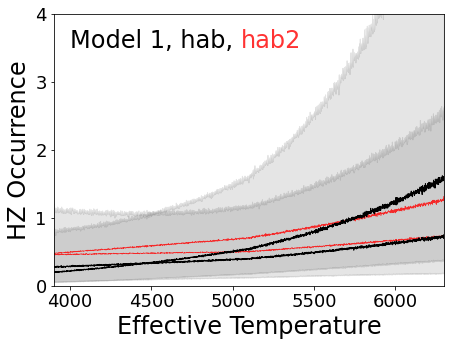

In [16]:
plt.figure(figsize=(7,5))

dist1 = hab2Occ["hab2"]["small"]["extrap_zero"]["optimistic"]["dist"]
teff1 = hab2Occ["hab2"]["small"]["extrap_zero"]["optimistic"]["teff"]
dist2 = hab2Occ["hab2"]["small"]["extrap_const"]["optimistic"]["dist"]
teff2 = hab2Occ["hab2"]["small"]["extrap_const"]["optimistic"]["teff"]
a, b, c = np.percentile(dist1, [16, 50, 84], axis=1)
plt.plot(teff1, b, "r", lw=0.5, alpha=0.8)
a, b, c = np.percentile(dist2, [16, 50, 84], axis=1)
plt.plot(teff2, b, "r", lw=0.5, alpha=0.8)
dist1 = habOcc["hab2"]["small"]["extrap_zero"]["optimistic"]["dist"]
teff1 = habOcc["hab2"]["small"]["extrap_zero"]["optimistic"]["teff"]
dist2 = habOcc["hab2"]["small"]["extrap_const"]["optimistic"]["dist"]
teff2 = habOcc["hab2"]["small"]["extrap_const"]["optimistic"]["teff"]
temp_vs_hzOcc(dist1, teff1, dist2, teff2, newFigure=False)
plt.text(4000, 3.5, "Model 1, hab,", fontsize=24)
plt.text(5050, 3.5, "hab2", c='r', fontsize=24, alpha=0.8)
plt.savefig(figDir + "/hzTeffVsHZOcc_hab_teff_uncertainty.pdf",bbox_inches='tight')


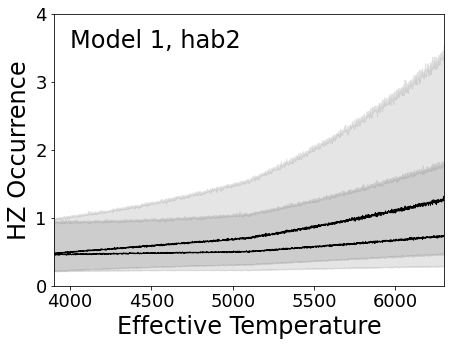

In [17]:
dist1 = hab2Occ["hab2"]["small"]["extrap_zero"]["optimistic"]["dist"]
teff1 = hab2Occ["hab2"]["small"]["extrap_zero"]["optimistic"]["teff"]
dist2 = hab2Occ["hab2"]["small"]["extrap_const"]["optimistic"]["dist"]
teff2 = hab2Occ["hab2"]["small"]["extrap_const"]["optimistic"]["teff"]
temp_vs_hzOcc(dist1, teff1, dist2, teff2)
plt.text(4000, 3.5, "Model 1, hab2", fontsize=24)
plt.savefig(figDir + "/hzTeffVsHZOcc_hab2_teff_uncertainty.pdf",bbox_inches='tight')


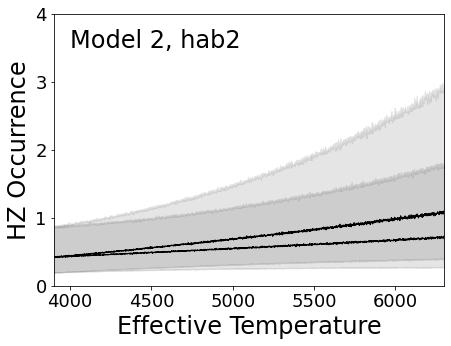

In [18]:
dist1 = hab2OccTripleNoGeom["hab2"]["small"]["extrap_zero"]["optimistic"]["dist"]
teff1 = hab2OccTripleNoGeom["hab2"]["small"]["extrap_zero"]["optimistic"]["teff"]
dist2 = hab2OccTripleNoGeom["hab2"]["small"]["extrap_const"]["optimistic"]["dist"]
teff2 = hab2OccTripleNoGeom["hab2"]["small"]["extrap_const"]["optimistic"]["teff"]
temp_vs_hzOcc(dist1, teff1, dist2, teff2)
plt.text(4000, 3.5, "Model 2, hab2", fontsize=24)
plt.savefig(figDir + "/hzTeffVsHZOcc_hab2_triple_uncertainty.pdf",bbox_inches='tight')


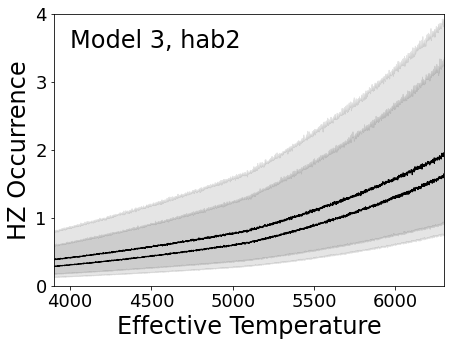

In [19]:
dist1 = hab2OccDual["hab2"]["small"]["extrap_zero"]["optimistic"]["dist"]
teff1 = hab2OccDual["hab2"]["small"]["extrap_zero"]["optimistic"]["teff"]
dist2 = hab2OccDual["hab2"]["small"]["extrap_const"]["optimistic"]["dist"]
teff2 = hab2OccDual["hab2"]["small"]["extrap_const"]["optimistic"]["teff"]
temp_vs_hzOcc(dist1, teff1, dist2, teff2)
plt.text(4000, 3.5, "Model 3, hab2", fontsize=24)
plt.savefig(figDir + "/hzTeffVsHZOcc_hab2_noteff_uncertainty.pdf",bbox_inches='tight')


In [23]:
capsize = 8
cbc = ['#377eb8', '#ff7f00', '#4daf4a',
                  '#f781bf', '#a65628', '#984ea3',
                  '#999999', '#e41a1c', '#dede00']
def show_stellar_props(extrapType, hzType, rel):
    plt.figure(figsize=(7,5));
    legendStr = []

    for i, stellarType in enumerate(stellarTypes):
        dist = hzOccTeff[stellarType][extrapType][hzType][rel]["dist"]
        if stellarType == "hab2":
            plt.hist(dist[dist<5], 50, color = 'k', lw = 5.0, histtype="step", density=True, zorder=100)
        else:
            plt.hist(dist[dist<5], 50, ls = "--", color = 'k', histtype="step", density=True, zorder=1)
        legendStr.append(stellarType + ", Model 1")

    for i, stellarType in enumerate(stellarTypes):
        dist = hzOccTriple[stellarType][extrapType][hzType][rel]["dist"]
        if stellarType == "hab2":
            plt.hist(dist[dist<5], 50, color = cbc[0], histtype="step", density=True, zorder=1)
        else:
            plt.hist(dist[dist<5], 50, ls = "--", color = cbc[0], histtype="step", density=True, zorder=1)
        legendStr.append(stellarType + ", Model 2")

    for i, stellarType in enumerate(stellarTypes):
        dist = hzOcc[stellarType][extrapType][hzType][rel]["dist"]
        if stellarType == "hab2":
            plt.hist(dist[dist<5], 50, color = cbc[1], histtype="step", density=True, zorder=1)
        else:
            plt.hist(dist[dist<5], 50, ls = "--", color = cbc[1], histtype="step", density=True, zorder=1)
        legendStr.append(stellarType + ", Model 3")

    plt.legend(legendStr, fontsize = 16, loc = "right");
    yl = plt.ylim()
    yl = plt.ylim()
    ebHeight = 1.08
    for i, stellarType in enumerate(stellarTypes):
        dist = hzOccTeff[stellarType][extrapType][hzType][rel]["dist"]
        stats = ut.medianAndErrorbars(dist.flatten())
        if stellarType == "hab2":
            plt.errorbar(stats[0], ebHeight*yl[1], xerr=[[stats[2]],[stats[1]]], lw = 3.0, capsize = capsize, color = 'k', fmt='-d', zorder=100)
        else:
            eb = plt.errorbar(stats[0], ebHeight*yl[1], xerr=[[stats[2]],[stats[1]]], capsize = capsize, color = 'k', fmt='-d', zorder=1)
            eb[-1][0].set_linestyle('--')
        ebHeight -= 0.02

    for i, stellarType in enumerate(stellarTypes):
        dist = hzOccTriple[stellarType][extrapType][hzType][rel]["dist"]
        stats = ut.medianAndErrorbars(dist.flatten())
        if stellarType == "hab2":
            eb = plt.errorbar(stats[0], ebHeight*yl[1], xerr=[[stats[2]],[stats[1]]], capsize = capsize, color = cbc[0], fmt='d')
        else:
            eb = plt.errorbar(stats[0], ebHeight*yl[1], xerr=[[stats[2]],[stats[1]]], capsize = capsize, color = cbc[0], fmt='d')
            eb[-1][0].set_linestyle('--')
        ebHeight -= 0.02

    for i, stellarType in enumerate(stellarTypes):
        dist = hzOcc[stellarType][extrapType][hzType][rel]["dist"]
        stats = ut.medianAndErrorbars(dist.flatten())
        if stellarType == "hab2":
            eb = plt.errorbar(stats[0], ebHeight*yl[1], xerr=[[stats[2]],[stats[1]]], capsize = capsize, color = cbc[1], fmt='d')
        else:
            eb = plt.errorbar(stats[0], ebHeight*yl[1], xerr=[[stats[2]],[stats[1]]], ls = "--", capsize = capsize, color = cbc[1], fmt='d')
            eb[-1][0].set_linestyle('--')
        ebHeight -= 0.02

    plt.gca().set_yticklabels([])
    xl = plt.xlim()
    plt.xlim(xl[0], 5)
    plt.tick_params(labelsize = 18)

def show_extrap(stellarType, hzType, rel):
    plt.figure(figsize=(7,5));
    legendStr = []
    for i, extrapType in enumerate(extrapTypes):
        dist = hzOccTeff[stellarType][extrapType][hzType][rel]["dist"]
        plt.hist(dist[dist<5], 50, color = cbc[i], lw = 2.0, histtype="step", density=True)
        legendStr.append(extrapType)

    plt.legend(legendStr, fontsize = 18);
    yl = plt.ylim()
    ebHeight = 1.06
    for i, extrapType in enumerate(extrapTypes):
        dist = hzOccTeff[stellarType][extrapType][hzType][rel]["dist"]
        stats = ut.medianAndErrorbars(dist.flatten())
        h = plt.errorbar(stats[0], ebHeight*yl[1], xerr=[[stats[2]],[stats[1]]], capsize = capsize, color = cbc[i], fmt='--d')
        ebHeight -= 0.02



    plt.gca().set_yticklabels([])
    xl = plt.xlim()
    plt.xlim(xl[0], 5)
    plt.tick_params(labelsize = 18)


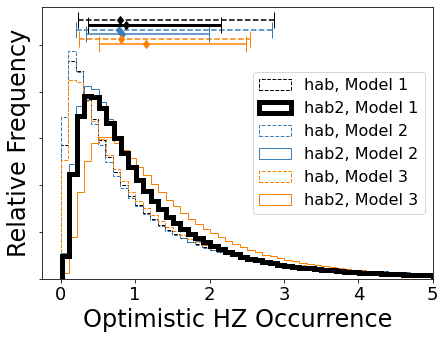

In [25]:
show_stellar_props("extrap_zero", "optimistic", "reliability")
plt.xlabel("Optimistic HZ Occurrence", fontsize = 24)
plt.ylabel("Relative Frequency", fontsize = 24)
plt.savefig(figDir + "/optHzStellar_uncertainty.pdf",bbox_inches='tight')


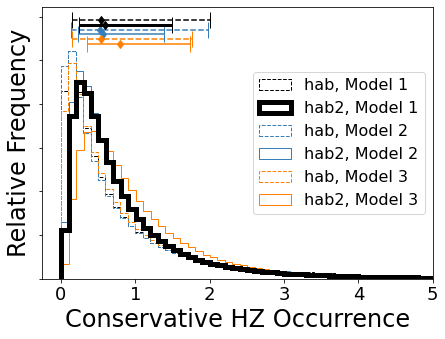

In [26]:
show_stellar_props("extrap_zero", "conservative", "reliability")
plt.xlabel("Conservative HZ Occurrence", fontsize = 24)
plt.ylabel("Relative Frequency", fontsize = 24)
plt.savefig(figDir + "/consHzStellar_uncertainty.pdf",bbox_inches='tight')


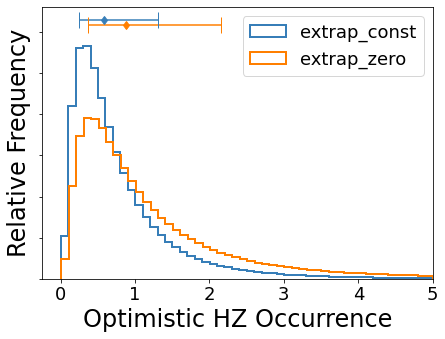

In [27]:
show_extrap("hab2", "optimistic", "reliability")
plt.xlabel("Optimistic HZ Occurrence", fontsize = 24)
plt.ylabel("Relative Frequency", fontsize = 24)
plt.savefig(figDir + "/optHzExtrap_uncertainty.pdf",bbox_inches='tight')


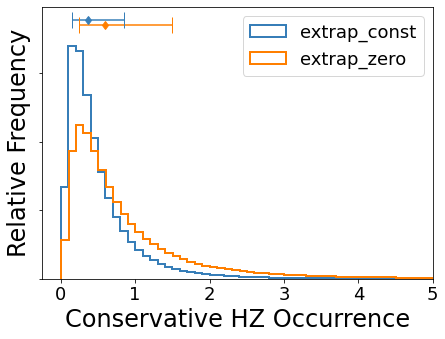

In [28]:
show_extrap("hab2", "conservative", "reliability")
plt.xlabel("Conservative HZ Occurrence", fontsize = 24)
plt.ylabel("Relative Frequency", fontsize = 24)
plt.savefig(figDir + "/consHzExtrap_uncertainty.pdf",bbox_inches='tight')


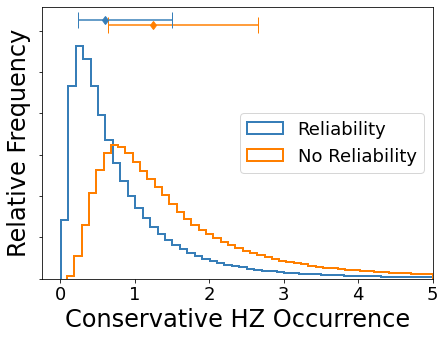

In [29]:
stellarType = "hab2"
hzType = "conservative"
extrapType = "extrap_zero"
relTypes = ["reliability", "noReliability"]
relTypeLabels = ["Reliability", "No Reliability"]
plt.figure(figsize=(7,5));
legendStr = []
for i, relType in enumerate(relTypes):
    dist = hzOccTeff[stellarType][extrapType][hzType][relType]["dist"]
    plt.hist(dist[dist<5], 50, color = cbc[i], lw = 2.0, histtype="step", density=True)
    legendStr.append(relTypeLabels[i])

plt.legend(legendStr, fontsize = 18, loc = "right");
yl = plt.ylim()
ebHeight = 1.06
for i, relType in enumerate(relTypes):
    dist = hzOccTeff[stellarType][extrapType][hzType][relType]["dist"]
    stats = ut.medianAndErrorbars(dist.flatten())
    h = plt.errorbar(stats[0], ebHeight*yl[1], xerr=[[stats[2]],[stats[1]]], capsize = capsize, color = cbc[i], fmt='--d')
    ebHeight -= 0.02


plt.gca().set_yticklabels([])
xl = plt.xlim()
plt.xlim(xl[0], 5)
plt.tick_params(labelsize = 18)
plt.xlabel("Conservative HZ Occurrence", fontsize = 24);
plt.ylabel("Relative Frequency", fontsize = 24)
plt.savefig(figDir + "/consHzReliability_uncertainty.pdf",bbox_inches='tight')


In [26]:
hzOccTeff[stellarType][extrapType][hzType]["reliability"]["str"]

'0.60^{+0.90}_{-0.36}'

In [27]:
ut.printMedianAndErrorbars(hzOccTeff[stellarType][extrapType][hzType]["noReliability"]["dist"].flatten(), precision=2)

'1.25^{+1.40}_{-0.60}'

In [28]:
print("% fits with uncertainty")
print("& \\multicolumn{2}{c}{With Uncertainty} & \\multicolumn{2}{c}{Without Uncertainty} \\\\")
for stellarType in stellarTypes:
    print(" & " + stellarType)
for stellarType in stellarTypes:
    print(" & " + stellarType)
print("\\\\")
print("& low -- high & low -- high  & low -- high & low -- high  \\\\")
print("\\hline")


% fits with uncertainty
& \multicolumn{2}{c}{With Uncertainty} & \multicolumn{2}{c}{Without Uncertainty} \\
 & hab
 & hab2
 & hab
 & hab2
\\
& low -- high & low -- high  & low -- high & low -- high  \\
\hline


In [29]:
def print_stellar_occur(data, data0, modelNum, hzType):
    print("Model " + str(modelNum))
    for stellarType in stellarTypes:
        print(" & $" 
              + data[stellarType]["extrap_const"][hzType]["reliability"]["str"] + "$ -- $"
              + data[stellarType]["extrap_zero"][hzType]["reliability"]["str"] + "$ ")
    for stellarType in stellarTypes:
        print(" & $" 
              + data0[stellarType]["extrap_const"][hzType]["reliability"]["str"] + "$ -- $"
              + data0[stellarType]["extrap_zero"][hzType]["reliability"]["str"] + "$ ")
    print("\\\\")

print("% occurrence with uncertainty")
print("& \\multicolumn{2}{c}{With Uncertainty} & \\multicolumn{2}{c}{Without Uncertainty} \\\\")
for stellarType in stellarTypes:
    print(" & " + stellarType)
for stellarType in stellarTypes:
    print(" & " + stellarType)
print("\\\\")
print("& low -- high & low -- high & low -- high & low -- high \\\\")
print("\\hline")
print("& \\multicolumn{4}{c}{{\\bf Conservative Habitable Zone}} \\\\")
print_stellar_occur(hzOccTeff, hzOccTeff0, 1, "conservative")
print_stellar_occur(hzOccTriple, hzOccTriple0, 2, "conservative")
print_stellar_occur(hzOcc, hzOcc0, 3, "conservative")
print("& \\multicolumn{4}{c}{{\\bf Optimistic Habitable Zone}} \\\\")
print_stellar_occur(hzOccTeff, hzOccTeff0, 1, "optimistic")
print_stellar_occur(hzOccTriple, hzOccTriple0, 2, "optimistic")
print_stellar_occur(hzOcc, hzOcc0, 3, "optimistic")


% occurrence with uncertainty
& \multicolumn{2}{c}{With Uncertainty} & \multicolumn{2}{c}{Without Uncertainty} \\
 & hab
 & hab2
 & hab
 & hab2
\\
& low -- high & low -- high & low -- high & low -- high \\
\hline
& \multicolumn{4}{c}{{\bf Conservative Habitable Zone}} \\
Model 1
 & $0.30^{+0.69}_{-0.21}$ -- $0.54^{+1.47}_{-0.39}$ 
 & $0.37^{+0.48}_{-0.21}$ -- $0.60^{+0.90}_{-0.36}$ 
 & $0.15^{+0.32}_{-0.11}$ -- $0.34^{+0.83}_{-0.25}$ 
 & $0.34^{+0.37}_{-0.18}$ -- $0.54^{+0.69}_{-0.30}$ 
\\
Model 2
 & $0.28^{+0.66}_{-0.20}$ -- $0.53^{+1.46}_{-0.40}$ 
 & $0.39^{+0.51}_{-0.23}$ -- $0.56^{+0.83}_{-0.33}$ 
 & $0.19^{+0.39}_{-0.13}$ -- $0.32^{+0.78}_{-0.23}$ 
 & $0.33^{+0.38}_{-0.18}$ -- $0.53^{+0.70}_{-0.30}$ 
\\
Model 3
 & $0.31^{+0.69}_{-0.22}$ -- $0.54^{+1.22}_{-0.39}$ 
 & $0.59^{+0.74}_{-0.34}$ -- $0.79^{+0.95}_{-0.44}$ 
 & $0.21^{+0.42}_{-0.15}$ -- $0.30^{+0.64}_{-0.21}$ 
 & $0.50^{+0.60}_{-0.28}$ -- $0.72^{+0.80}_{-0.39}$ 
\\
& \multicolumn{4}{c}{{\bf Optimistic Habitable Zone}} \\
Mo

In [30]:
stellarTypes = ["GK", "FGK"]
extrapTypes = ["extrap_const", "extrap_zero"]
hzTypes = ["optimistic", "conservative"]
catalog = "dr25"

fileName = "hzOccTeffFGK_model1_uncertainty.pkl"
if path.exists(fileName): 
    f = open(fileName, "rb")    
    hzOccTeffFGK = pickle.load(f)
    f.close()
else:
    hzOccTeffFGK = {}
    for stellarType in stellarTypes:
        if stellarType == "hab":
            teffRange = (4800, 6300)
        elif stellarType == "hab2":
            teffRange = (3900, 6300)
        elif stellarType == "GK":
            teffRange = (3900, 6000)
        elif stellarType == "FGK":
            teffRange = (3900, 7300)
        else:
            raise ValueError('Bad catalog name');

        cs = rm3D.compSpace(periodName = "Insolation", 
                       periodUnits = "Earth Flux",
                       periodRange = (0.2, 2.2), 
                       nPeriod = 61, 
                       radiusName = "Radius", 
                       radiusUnits = "$R_\oplus$",
                       rpRange = (0.5, 2.5), 
                       nRp = 61,
                       tempName = "$T_\mathrm{eff}$", 
                       tempUnits = "$R_\oplus$",
                       tempRange = teffRange, 
                       nTemp = 10)

        model = rm3D.triplePowerLawTeffAvg(cs) # model 1
        hzOccTeffFGK[stellarType] = {}
        for extrapType in extrapTypes:
            outDir = "computeOccurrencefixedTeff_" + catalog + "_" + stellarType + "_"  \
                + model.name + "_" + extrapType + "_uncertainty_out"
            print(outDir)
            if not path.exists(outDir): 
                print("does not exist")
                continue
            hzOccTeffFGK[stellarType][extrapType] = {}
            for hzType in hzTypes:
                hzOccTeffFGK[stellarType][extrapType][hzType] = {}

                post = np.load(outDir + "/occurenceRatePosteriors.npy")           
                hzOccTeffFGK[stellarType][extrapType][hzType]["reliability"] = {}
                hzOccTeffFGK[stellarType][extrapType][hzType]["reliability"]["fitData"] \
                    = ut.medianAndErrorbars(post)
                hzOccTeffFGK[stellarType][extrapType][hzType]["reliability"]["dist"], \
                    hzOccTeffFGK[stellarType][extrapType][hzType]["reliability"]["teff"] \
                    = rm3D.hzOccRate2D([4800,6300], [0.5,1.5], post, model, 
                                     cs, nSamples = 10000, hzType = hzType)
                hzOccTeffFGK[stellarType][extrapType][hzType]["reliability"]["distGK"], \
                    hzOccTeffFGK[stellarType][extrapType][hzType]["reliability"]["teffGK"] \
                    = rm3D.hzOccRate2D([3900,6000], [0.5,1.5], post, model, 
                                     cs, nSamples = 10000, hzType = hzType)
                hzOccTeffFGK[stellarType][extrapType][hzType]["reliability"]["distFGK"], \
                    hzOccTeffFGK[stellarType][extrapType][hzType]["reliability"]["teffFGK"] \
                    = rm3D.hzOccRate2D([3900,7300], [0.5,1.5], post, model, 
                                     cs, nSamples = 10000, hzType = hzType)
                hzOccTeffFGK[stellarType][extrapType][hzType]["reliability"]["str"] \
                    = ut.printMedianAndErrorbars(hzOccTeffFGK[stellarType][extrapType][hzType]["reliability"]["dist"].flatten(), precision=2)
                hzOccTeffFGK[stellarType][extrapType][hzType]["reliability"]["strGK"] \
                    = ut.printMedianAndErrorbars(hzOccTeffFGK[stellarType][extrapType][hzType]["reliability"]["distGK"].flatten(), precision=2)
                hzOccTeffFGK[stellarType][extrapType][hzType]["reliability"]["strFGK"] \
                    = ut.printMedianAndErrorbars(hzOccTeffFGK[stellarType][extrapType][hzType]["reliability"]["distFGK"].flatten(), precision=2)

                post = np.load(outDir + "/occurenceRatePosteriors_noreliability.npy")           
                hzOccTeffFGK[stellarType][extrapType][hzType]["noReliability"] = {}
                hzOccTeffFGK[stellarType][extrapType][hzType]["noReliability"]["fitData"] \
                    = ut.medianAndErrorbars(post)
                hzOccTeffFGK[stellarType][extrapType][hzType]["noReliability"]["dist"], \
                    hzOccTeffFGK[stellarType][extrapType][hzType]["noReliability"]["teff"] \
                    = rm3D.hzOccRate2D([4800,6300], [0.5,1.5], post, model, 
                                     cs, nSamples = 10000, hzType = hzType)
                hzOccTeffFGK[stellarType][extrapType][hzType]["noReliability"]["str"] \
                    = ut.printMedianAndErrorbars(hzOccTeffFGK[stellarType][extrapType][hzType]["noReliability"]["dist"], precision=2)

    f = open(fileName,"wb")
    pickle.dump(hzOccTeffFGK,f)
    f.close()


In [31]:
stellarTypes = ["GK", "FGK"]
extrapTypes = ["extrap_const", "extrap_zero"]
hzTypes = ["optimistic", "conservative"]
catalog = "dr25"

fileName = "hzOccTeffFGK_model1.pkl"
if path.exists(fileName): 
    f = open(fileName, "rb")    
    hzOccTeffFGK0 = pickle.load(f)
    f.close()
else:
    hzOccTeffFGK0 = {}
    for stellarType in stellarTypes:
        if stellarType == "hab":
            teffRange = (4800, 6300)
        elif stellarType == "hab2":
            teffRange = (3900, 6300)
        elif stellarType == "GK":
            teffRange = (3900, 6000)
        elif stellarType == "FGK":
            teffRange = (3900, 7300)
        else:
            raise ValueError('Bad catalog name');

        cs = rm3D.compSpace(periodName = "Insolation", 
                       periodUnits = "Earth Flux",
                       periodRange = (0.2, 2.2), 
                       nPeriod = 61, 
                       radiusName = "Radius", 
                       radiusUnits = "$R_\oplus$",
                       rpRange = (0.5, 2.5), 
                       nRp = 61,
                       tempName = "$T_\mathrm{eff}$", 
                       tempUnits = "$R_\oplus$",
                       tempRange = teffRange, 
                       nTemp = 10)

        model = rm3D.triplePowerLawTeffAvg(cs) # model 1
        hzOccTeffFGK0[stellarType] = {}
        for extrapType in extrapTypes:
            outDir = "computeOccurrencefixedTeff_" + catalog + "_" + stellarType + "_"  \
                + model.name + "_" + "optimistic" + "_" + extrapType + "_out"
            print(outDir)
            if not path.exists(outDir): 
                print("does not exist")
                continue
            hzOccTeffFGK0[stellarType][extrapType] = {}
            for hzType in hzTypes:
                hzOccTeffFGK0[stellarType][extrapType][hzType] = {}

                post = np.load(outDir + "/occurenceRatePosteriors.npy")           
                hzOccTeffFGK0[stellarType][extrapType][hzType]["reliability"] = {}
                hzOccTeffFGK0[stellarType][extrapType][hzType]["reliability"]["fitData"] \
                    = ut.medianAndErrorbars(post)
                hzOccTeffFGK0[stellarType][extrapType][hzType]["reliability"]["dist"], \
                    hzOccTeffFGK0[stellarType][extrapType][hzType]["reliability"]["teff"] \
                    = rm3D.hzOccRate2D([4800,6300], [0.5,1.5], post, model, 
                                     cs, nSamples = 10000, hzType = hzType)
                hzOccTeffFGK0[stellarType][extrapType][hzType]["reliability"]["distGK"], \
                    hzOccTeffFGK0[stellarType][extrapType][hzType]["reliability"]["teffGK"] \
                    = rm3D.hzOccRate2D([3900,6000], [0.5,1.5], post, model, 
                                     cs, nSamples = 10000, hzType = hzType)
                hzOccTeffFGK0[stellarType][extrapType][hzType]["reliability"]["distFGK"], \
                    hzOccTeffFGK0[stellarType][extrapType][hzType]["reliability"]["teffFGK"] \
                    = rm3D.hzOccRate2D([3900,7300], [0.5,1.5], post, model, 
                                     cs, nSamples = 10000, hzType = hzType)
                hzOccTeffFGK0[stellarType][extrapType][hzType]["reliability"]["str"] \
                    = ut.printMedianAndErrorbars(hzOccTeffFGK0[stellarType][extrapType][hzType]["reliability"]["dist"].flatten(), precision=2)
                hzOccTeffFGK0[stellarType][extrapType][hzType]["reliability"]["strGK"] \
                    = ut.printMedianAndErrorbars(hzOccTeffFGK0[stellarType][extrapType][hzType]["reliability"]["distGK"].flatten(), precision=2)
                hzOccTeffFGK0[stellarType][extrapType][hzType]["reliability"]["strFGK"] \
                    = ut.printMedianAndErrorbars(hzOccTeffFGK0[stellarType][extrapType][hzType]["reliability"]["distFGK"].flatten(), precision=2)

                post = np.load(outDir + "/occurenceRatePosteriors_noreliability.npy")           
                hzOccTeffFGK0[stellarType][extrapType][hzType]["noReliability"] = {}
                hzOccTeffFGK0[stellarType][extrapType][hzType]["noReliability"]["fitData"] \
                    = ut.medianAndErrorbars(post)
                hzOccTeffFGK0[stellarType][extrapType][hzType]["noReliability"]["dist"], \
                    hzOccTeffFGK0[stellarType][extrapType][hzType]["noReliability"]["teff"] \
                    = rm3D.hzOccRate2D([4800,6300], [0.5,1.5], post, model, 
                                     cs, nSamples = 10000, hzType = hzType)
                hzOccTeffFGK0[stellarType][extrapType][hzType]["noReliability"]["str"] \
                    = ut.printMedianAndErrorbars(hzOccTeffFGK0[stellarType][extrapType][hzType]["noReliability"]["dist"], precision=2)

    f = open(fileName,"wb")
    pickle.dump(hzOccTeffFGK0,f)
    f.close()


In [32]:
def print_occ_typesFGK(data, data0, hzType, occStr):
    for stellarType in stellarTypes:
        print("& $" 
              + data[stellarType]["extrap_const"][hzType]["reliability"]["str" + occStr] + "$ -- $"
              + data[stellarType]["extrap_zero"][hzType]["reliability"]["str" + occStr] + "$ ")
    for stellarType in stellarTypes:
        print("& $" 
              + data0[stellarType]["extrap_const"][hzType]["reliability"]["str" + occStr] + "$ -- $"
              + data0[stellarType]["extrap_zero"][hzType]["reliability"]["str" + occStr] + "$ ")

def print_pop_tableFGK(data, data0, modelNum, hasGamma):
    print("& \\multicolumn{4}{c}{Model " + str(modelNum) + "} \\\\")
    print("$F_0$")
    print_stellar_types(data, data0, 0)
    print("\\\\")
    print("$\\alpha$")
    print_stellar_types(data, data0, 2)
    print("\\\\")
    print("$\\beta$")
    print_stellar_types(data, data0, 1)
    print("\\\\")
    if hasGamma:
        print("$\\gamma$")
        print_stellar_types(data, data0, 3)
        print("\\\\")
    print("$\\eta_\oplus^\mathrm{C}$")
    print_occ_types(data, data0, "conservative")
    print("\\\\")
    print("$\\eta_{\oplus,\mathrm{GK}}^\mathrm{C}$")
    print_occ_typesFGK(data, data0, "conservative", "GK")
    print("\\\\")
    print("$\\eta_{\oplus,\mathrm{FGK}}^\mathrm{C}$")
    print_occ_typesFGK(data, data0, "conservative", "FGK")
    print("\\\\")
    print("$\\eta_\oplus^\mathrm{O}$")
    print_occ_types(data, data0, "optimistic")
    print("\\\\")
    print("$\\eta_{\oplus,\mathrm{GK}}^\mathrm{O}$")
    print_occ_typesFGK(data, data0, "optimistic", "GK")
    print("\\\\")
    print("$\\eta_{\oplus,\mathrm{FGK}}^\mathrm{O}$")
    print_occ_typesFGK(data, data0, "optimistic", "FGK")
    print("\\\\")

    


In [43]:
print("% fits with uncertainty")
print("& \\multicolumn{2}{c}{With Uncertainty} & \\multicolumn{2}{c}{Without Uncertainty} \\\\")
for stellarType in stellarTypes:
    print(" & Computed w/ " + stellarType + " Stars")
for stellarType in stellarTypes:
    print(" & Computed w/ " + stellarType + " Stars")
print("\\\\")
print("& low -- high & low -- high  & low -- high & low -- high  \\\\")
print("\\hline")
print_pop_tableFGK(hzOccTeffFGK, hzOccTeffFGK0, 1, True)


% fits with uncertainty
& \multicolumn{2}{c}{With Uncertainty} & \multicolumn{2}{c}{Without Uncertainty} \\
 & Computed w/ GK Stars
 & Computed w/ FGK Stars
 & Computed w/ GK Stars
 & Computed w/ FGK Stars
\\
& low -- high & low -- high  & low -- high & low -- high  \\
\hline
& \multicolumn{4}{c}{Model 1} \\
$F_0$
 & 
$+1.01^{+0.82}_{-0.4}$
 -- 
$+1.23^{+1.12}_{-0.52}$
 & 
$+1.26^{+1.2}_{-0.55}$
 -- 
$+2.36^{+2.94}_{-1.2}$
 & 
$+0.89^{+0.64}_{-0.33}$
 -- 
$+1.12^{+0.83}_{-0.44}$
 & 
$+1.24^{+1.03}_{-0.51}$
 -- 
$+2.05^{+2.14}_{-0.98}$
\\
$\alpha$
 & 
$-1.00^{+1.0}_{-0.9}$
 -- 
$-1.05^{+1.0}_{-0.9}$
 & 
$-1.03^{+0.95}_{-0.87}$
 -- 
$-1.16^{+0.94}_{-0.85}$
 & 
$-0.80^{+0.93}_{-0.83}$
 -- 
$-0.90^{+0.87}_{-0.78}$
 & 
$-1.00^{+0.84}_{-0.77}$
 -- 
$-0.96^{+0.87}_{-0.78}$
\\
$\beta$
 & 
$-0.90^{+0.34}_{-0.32}$
 -- 
$-1.13^{+0.37}_{-0.36}$
 & 
$-0.82^{+0.32}_{-0.3}$
 -- 
$-1.23^{+0.36}_{-0.34}$
 & 
$-0.84^{+0.33}_{-0.3}$
 -- 
$-1.08^{+0.36}_{-0.34}$
 & 
$-0.82^{+0.3}_{-0.27}$
 -- 
$-1.21^{+0.

In [5]:
teffRange = (3900, 6300)

cs = rm3D.compSpace(periodName = "Insolation", 
               periodUnits = "Earth Flux",
               periodRange = (0.2, 2.2), 
               nPeriod = 61, 
               radiusName = "Radius", 
               radiusUnits = "$R_\oplus$",
               rpRange = (0.5, 2.5), 
               nRp = 61,
               tempName = "$T_\mathrm{eff}$", 
               tempUnits = "$R_\oplus$",
               tempRange = teffRange, 
               nTemp = 10)

model = rm3D.triplePowerLawTeffAvg(cs) # model 1
hab2_extrap_zero_post = np.load("computeOccurrencefixedTeff_dr25_hab2_triplePowerLawTeffAvg_extrap_zero_uncertainty_out/occurenceRatePosteriors.npy")
hab2_extrap_const_post = np.load("computeOccurrencefixedTeff_dr25_hab2_triplePowerLawTeffAvg_extrap_const_uncertainty_out/occurenceRatePosteriors.npy")

gOccConsE0, teff = rm3D.hzOccRate2D([5300,6000], [0.5,1.5], hab2_extrap_zero_post, model, cs, nSamples = 10000, hzType = "conservative")
gOccOptE0, teff = rm3D.hzOccRate2D([5300,6000], [0.5,1.5], hab2_extrap_zero_post, model, cs, nSamples = 10000, hzType = "optimistic")
kOccConsE0, teff = rm3D.hzOccRate2D([3900,5300], [0.5,1.5], hab2_extrap_zero_post, model, cs, nSamples = 10000, hzType = "conservative")
kOccOptE0, teff = rm3D.hzOccRate2D([3900,5300], [0.5,1.5], hab2_extrap_zero_post, model, cs, nSamples = 10000, hzType = "optimistic")
gkOccConsE0, teff = rm3D.hzOccRate2D([3900,6000], [0.5,1.5], hab2_extrap_zero_post, model, cs, nSamples = 10000, hzType = "conservative")
gkOccOptE0, teff = rm3D.hzOccRate2D([3900,6000], [0.5,1.5], hab2_extrap_zero_post, model, cs, nSamples = 10000, hzType = "optimistic")

gOccConsEc, teff = rm3D.hzOccRate2D([5300,6000], [0.5,1.5], hab2_extrap_const_post, model, cs, nSamples = 10000, hzType = "conservative")
gOccOptEc, teff = rm3D.hzOccRate2D([5300,6000], [0.5,1.5], hab2_extrap_const_post, model, cs, nSamples = 10000, hzType = "optimistic")
kOccConsEc, teff = rm3D.hzOccRate2D([3900,5300], [0.5,1.5], hab2_extrap_const_post, model, cs, nSamples = 10000, hzType = "conservative")
kOccOptEc, teff = rm3D.hzOccRate2D([3900,5300], [0.5,1.5], hab2_extrap_const_post, model, cs, nSamples = 10000, hzType = "optimistic")
gkOccConsEc, teff = rm3D.hzOccRate2D([3900,6000], [0.5,1.5], hab2_extrap_const_post, model, cs, nSamples = 10000, hzType = "conservative")
gkOccOptEc, teff = rm3D.hzOccRate2D([3900,6000], [0.5,1.5], hab2_extrap_const_post, model, cs, nSamples = 10000, hzType = "optimistic")


FloatProgress(value=0.0, max=700.0)

FloatProgress(value=0.0, max=700.0)

FloatProgress(value=0.0, max=1400.0)

FloatProgress(value=0.0, max=1400.0)

FloatProgress(value=0.0, max=2100.0)

FloatProgress(value=0.0, max=2100.0)

FloatProgress(value=0.0, max=700.0)

FloatProgress(value=0.0, max=700.0)

FloatProgress(value=0.0, max=1400.0)

FloatProgress(value=0.0, max=1400.0)

FloatProgress(value=0.0, max=2100.0)

FloatProgress(value=0.0, max=2100.0)

In [6]:
def print_conf_interval(interval, hzType):
    fs = "{:.2f}"
    vl = np.percentile(hzOccTeff["hab2"]["extrap_const"][hzType]["reliability"]["dist"], interval)
    vh = np.percentile(hzOccTeff["hab2"]["extrap_zero"][hzType]["reliability"]["dist"], interval)
    print(" & [" + fs.format(vl[0]) + ", " + fs.format(vl[1]) + "]"
          + "& [" + fs.format(vh[0]) + ", " + fs.format(vh[1]) + "]"
          + " & [" + fs.format(vl[0]) + ", " + fs.format(vh[1]) + "] \\\\" )

def print_data_interval(data0, datac, interval, hzType):
    fs = "{:.2f}"
    vl = np.percentile(datac, interval)
    vh = np.percentile(data0, interval)
    print(" & [" + fs.format(vl[0]) + ", " + fs.format(vl[1]) + "]"
          + "& [" + fs.format(vh[0]) + ", " + fs.format(vh[1]) + "]"
          + " & [" + fs.format(vl[0]) + ", " + fs.format(vh[1]) + "] \\\\" )

print("% confidence interval with model 1, hab2, uncertainty")
print("& low & high & total \\\\")
print("\\hline")
print("\\multicolumn{4}{c}{95\\% Credible Interval} \\\\")
print("Conservative HZ Occurrence ($\\eta_\oplus^\\mathrm{C}$)") 
print_conf_interval([2.5, 97.5], "conservative")
print("Optimistic HZ Occurrence ($\\eta_\oplus^\\mathrm{O}$)") 
print_conf_interval([2.5, 97.5], "optimistic")
print("Conservative HZ Occurrence (G stars)") 
print_data_interval(gOccConsE0, gOccConsEc, [2.5, 97.5], "conservative")
print("Optimistic HZ Occurrence (G stars)") 
print_data_interval(gOccOptE0, gOccOptEc, [2.5, 97.5], "optimistic")
print("Conservative HZ Occurrence (K stars)") 
print_data_interval(kOccConsE0, kOccConsEc, [2.5, 97.5], "conservative")
print("Optimistic HZ Occurrence (K stars)") 
print_data_interval(kOccOptE0, kOccOptEc, [2.5, 97.5], "optimistic")
print("\\multicolumn{4}{c}{99\\% Credible Interval} \\\\")
print("Conservative HZ Occurrence ($\\eta_\oplus^\\mathrm{C}$)") 
print_conf_interval([0.5, 99.5], "conservative")
print("Optimistic HZ Occurrence ($\\eta_\oplus^\\mathrm{O}$)") 
print_conf_interval([0.5, 99.5], "optimistic")
print("Conservative HZ Occurrence (G stars)") 
print_data_interval(gOccConsE0, gOccConsEc, [0.5, 99.5], "conservative")
print("Optimistic HZ Occurrence (G stars)") 
print_data_interval(gOccOptE0, gOccOptEc, [0.5, 99.5], "optimistic")
print("Conservative HZ Occurrence (K stars)") 
print_data_interval(kOccConsE0, kOccConsEc, [0.5, 99.5], "conservative")
print("Optimistic HZ Occurrence (K stars)") 
print_data_interval(kOccOptE0, kOccOptEc, [0.5, 99.5], "optimistic")


% confidence interval with model 1, hab2, uncertainty
& low & high & total \\
\hline
\multicolumn{4}{c}{95\% Credible Interval} \\
Conservative HZ Occurrence ($\eta_\oplus^\mathrm{C}$)
 & [0.07, 1.91]& [0.10, 3.77] & [0.07, 3.77] \\
Optimistic HZ Occurrence ($\eta_\oplus^\mathrm{O}$)
 & [0.11, 2.88]& [0.16, 5.29] & [0.11, 5.29] \\
Conservative HZ Occurrence (G stars)
 & [0.07, 1.92]& [0.10, 3.76] & [0.07, 3.76] \\
Optimistic HZ Occurrence (G stars)
 & [0.11, 2.90]& [0.16, 5.26] & [0.11, 5.26] \\
Conservative HZ Occurrence (K stars)
 & [0.07, 1.34]& [0.09, 1.92] & [0.07, 1.92] \\
Optimistic HZ Occurrence (K stars)
 & [0.11, 1.96]& [0.13, 2.66] & [0.11, 2.66] \\
\multicolumn{4}{c}{99\% Credible Interval} \\
Conservative HZ Occurrence ($\eta_\oplus^\mathrm{C}$)
 & [0.04, 3.19]& [0.06, 6.91] & [0.04, 6.91] \\
Optimistic HZ Occurrence ($\eta_\oplus^\mathrm{O}$)
 & [0.06, 4.76]& [0.09, 9.58] & [0.06, 9.58] \\
Conservative HZ Occurrence (G stars)
 & [0.04, 3.13]& [0.06, 6.57] & [0.04, 6.57] \